## Homework 3
## Randall Mencias

In [2]:
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline
def clock(func):
    def inner(*arg, **kwargs):
        start = time.time() * 10 ** 6
        answer = func(*arg, **kwargs)
        # time.sleep(0.001)
        end = time.time() * 10 ** 6
        # print("Execution Time:" + str(end - start))
        return answer, (end - start)

    return inner


# Class Code
Node and Single linked list

In [3]:
class Node:  # Implements Nodes with code shown in class
    """
    Implementation of a node
    """

    def __init__(self, val=None):
        self.val = val
        self.next_node = None

    def set_next_node(self, next_node):
        self.next_node = next_node


class Singly_linked_list(object):

    def __init__(self, head_node=None):
        self.head_node = head_node

    # Using what was shown in class the object is implemented
    def list_traversed(self):
        """
        Output: prints list
         """
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node

    def insert_head(self, new_node):
        """
        Inserts new head
        Input: Node
        """
        new_node.set_next_node(self.head_node)
        self.head_node = new_node

    def insert_tail(self, new_node):
        """
                Inserts new tail
                Input: Node
                """
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)

    def insert_middle(self, new_node, value):
        """
                Inserts Node after value
                Input: Node
                value: Node before new Node
                """
        node = self.head_node
        while node.val != value:
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete(self):
        """
        Deletes Head and replaces with next node
        """
        node = self.head_node
        self.head_node = node.next_node
        node = None

    # merges 2 lists through recursion

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list.


In [4]:
def merge_list(L1, L2): #c +(n-1)
    '''

    :param L1: List 1
    :param L2: List 2
    :return: Merged list 1 and 2
    '''

    temp = None

    if L1 is None: #if list 1 is empty finish returning list 2
        return L2

    if L2 is None:
        return L1

    if L1.val <= L2.val: #when l1 is smaller than l2  recurse with l1 next node

        temp = L1 #stores head node
        #assigns new next node
        temp.next_node = merge_list(L1.next_node, L2) #n-1
    else: #recurse with l2 next node
        temp = L2
        temp.next_node = merge_list(L1, L2.next_node) #n-1

    return temp


list1 = Singly_linked_list()
list1.insert_head(Node(7))
list1.insert_head(Node(5))
list1.insert_head(Node(3))
list1.insert_head(Node(1))


list2 = Singly_linked_list()
list2.insert_head(Node(10))
list2.insert_head(Node(4))
list2.insert_head(Node(2))

list3 = Singly_linked_list()

list3.head_node = merge_list(list1.head_node, list2.head_node)
list3.list_traversed()




1
2
3
4
5
7
10


2. Calculate complexity

As the function decreases by n-1 with each recursive call until it finishes the time complexity can be described as:

$T(n) = k + (n-k)$

Or as

$O(n)$

### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class.
2. Use a couple of parragraphs to explain the steps of divide and conquer:
To divided and conquer a function it is important that the division occurs in a way that in makes the function easier to manage. When sorting an algorithm the problem arises at the moment of comparing between elements. This is where recursion comes in,to help break down the function into its different computations.
    - how/where do you divide?
        In the Quicksort algorithm the division occurs within the pivot a random number from the element which helps sort the array between an upper and a lower range, repeating the process until only 2 elements are left to sort easily
    - where/what do you conquer?
        The conquering part of the algorithm occurs and the breakdown point, when separating between a lower and an upper range, it's sorting the array by halves, when the process is repeated until between the all the lower and the upper halves the array has been broken into sorted smaller arrays
    - how/what do you combine?
        At the last part of the algorith all that is left is to combine the smaller sorted arrays between each other utilizing the pivot as its middle anchor all the way until a single array is left


In [5]:
def quicksort(list):
    '''
    Sorts List thorugh recursion
    :param list: List to Srto
    :return: Sorted List
    '''
    if len(list) <= 1:
        return list
    pivot = list.pop() # assigns the pop value to the pivot and deletes of the list
    l1 = []
    l2 = []
    for i in list: # size of n
        if i <= pivot: #here the division happens, as its inside of n it turns it inti n/2
            l1.append(i)
        else:
            l2.append(i)

    return quicksort(l1) + [pivot] + quicksort(l2) #joins the sorted arrays with the center pivot

list1 = [4,11, 5, 3, 1, 10, 4, 6, 8]
print(quicksort(list1))

[1, 3, 4, 4, 5, 6, 8, 10, 11]


3. Analyze complexity
As the algorithm goes through all the list each time it recurses we can get an n time complexity, nonetheless sin the pivot continually dived n into 2 for each recursion or in other words $log_2(n)$, the more times it recurses the more division it will take up. Multiplying this two complexities yields
$O(n)

### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

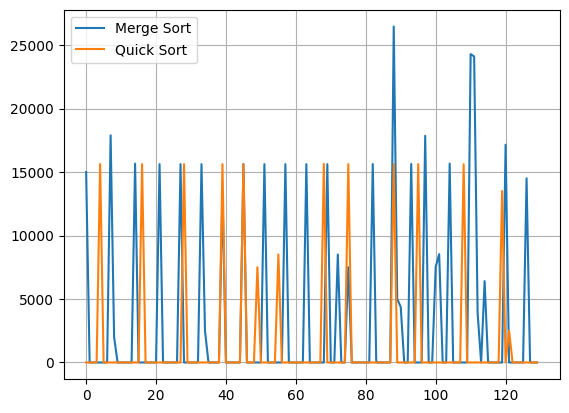

In [6]:
@clock
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])[0]
    right = merge_sort(nums[pivot:])[0]
    return merge(left, right)


def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1

    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])

    return sorted_list


@clock
def quicksort(list):
    '''
    Sorts List thorugh recursion
    :param list: List to Srto
    :return: Sorted List
    '''
    if len(list) <= 1:
        return list
    pivot = list.pop() # assigns the pop value to the pivot and deletes of the list
    l1 = []
    l2 = []
    for i in list:
        if i <= pivot:
            l1.append(i)
        else:
            l2.append(i)

    return quicksort(l1)[0] + [pivot] + quicksort(l2)[0] #joins the sorted arrays with the center pivot


def random_list():
    return [random.randint(1, 1000) for i in range(1000)]


# merge_sort_time = []
    # quicksort_time = []
lists = [random_list() for i in range(130)]
    # for i in lists:
    #     merge_sort_time.append(merge_sort(i)[1])
    #     quicksort_time.append(quicksort(i)[1])
merge_sort_time = [merge_sort(i)[1] for i in lists]
quicksort_time = [quicksort(i)[1] for i in lists]
merge_sort_time
quicksort_time
plt.plot(merge_sort_time, label="Merge Sort")
plt.plot(quicksort_time, label="Quick Sort")
plt.legend()
plt.grid()
plt.show()


According to the graph using quicksort tends to have a better time than the merge sort, this may happen due to the fact that merge sort utilizes two functions instead of single one like quick sort making it slightly slower than the other. Merge sort could be better if N was around a smaller number

### 4. Implement factorials with recursion

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it.
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?


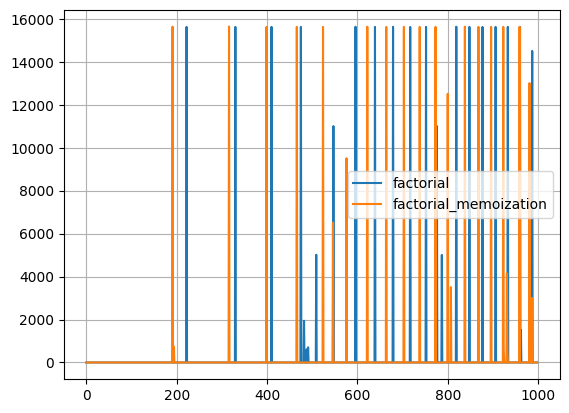

In [7]:
@clock
def factorial(n):
    '''
    :param n:
    :return: Factorial of N
    '''
    #base cases
    if n <= 0: #1
        return 1
    if n == 1:#1
        return 1
    #Time Complexity: 1+T(n-1)
    return n * factorial(n - 1)[0]


@clock
def factorial_memoization(n):
    '''
    Uses memoization for n!
    :param n:
    :return: n!
    '''
    cache = {} #1

    def recursive_factorial(n):
        #Creates cache
        if n in cache.keys():#1
            return cache[n]
        #Base Cases
        if n <= 0:#1
            return 1
        if n == 1:#1
            return 1
        else:
            #Time Complexity: 1 +t(n-1)
            cache[n] = n * factorial(n - 1)[0]
            return cache[n]

    return recursive_factorial(n)


factorial_time = [factorial(i)[1] for i in range(1, 1000)]
factorial_memoization_time = [factorial_memoization(i)[1] for i in range(1,1000)]
plt.plot(factorial_time, label="factorial")
plt.plot(factorial_memoization_time, label="factorial_memoization")
plt.legend()
plt.grid()
plt.show()




Both codes have the same complexity of $O(n)$

Using memoization in the factorial functions yields no real gain within itself or if its only called one time, as the factorial function has no split, and is straight down, this means that a stored value will never be called. The only true benefit of memoization would occur if the factorial memory was stored outside the function and was read everytime a factorial was used


### Time Complexity analysis  was done by hand in the pdf page
